In [6]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [7]:
#Import Data
chi = pd.read_csv("ChicagoRealEstate.csv")
cpi = pd.read_excel("Resources/CPI.xlsx")
mp = pd.read_excel("Resources/Median Sale Price.xlsx")
po = pd.read_excel("Resources/Population.xlsx")

cpi['Month'] = pd.DatetimeIndex(cpi['Date']).month
cpi['Year'] = pd.DatetimeIndex(cpi['Date']).year
cpi = cpi[["Year", "Month", "CPI"]]
mp['Month'] = pd.DatetimeIndex(mp['Date']).month
mp['Year'] = pd.DatetimeIndex(mp['Date']).year
mp = mp[["Year", "Month", "Median Sales Price"]]
po['Year'] = pd.DatetimeIndex(po['Date']).year
po['Month'] = pd.DatetimeIndex(po['Date']).month
po = po[["Year", "Month", "Population"]]

df1 = chi.merge(cpi, how="inner", on=['Year', 'Month'])
dfmonthly = df1.merge(po, how="inner", on=["Year", 'Month'])
dfmonthly

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population
0,0,1990,1,69.355887,76.897,5.4,7.6,9.8950,128.100,248743
1,1,1990,2,68.700554,77.053,5.3,7.2,10.1975,129.200,248920
2,2,1990,3,68.904077,77.200,5.2,7.0,10.2680,129.500,249146
3,3,1990,4,69.475721,77.277,5.4,7.4,10.3700,130.400,249436
4,4,1990,5,69.995388,77.297,5.4,7.0,10.4775,130.400,249707
...,...,...,...,...,...,...,...,...,...,...
371,371,2020,12,155.457127,235.568,6.7,9.4,2.6840,244.235,330924
372,372,2021,1,156.633251,238.555,6.3,9.8,2.7350,246.008,330968
373,373,2021,2,157.326126,241.624,6.2,9.5,2.8100,247.387,331004
374,374,2021,3,158.730817,245.303,6.0,8.4,3.0825,248.984,331061


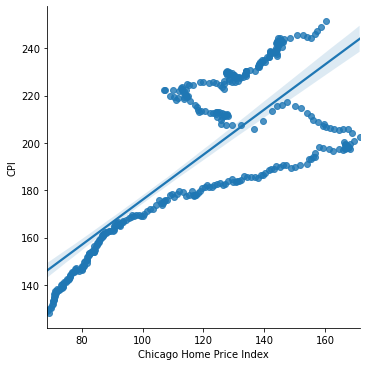

In [4]:
sns.lmplot(x="Chicago Home Price Index", y="CPI", data=dfmonthly);

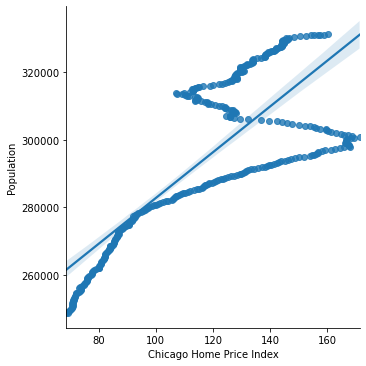

In [142]:
sns.lmplot(x="Chicago Home Price Index", y="Population", data=dfmonthly);

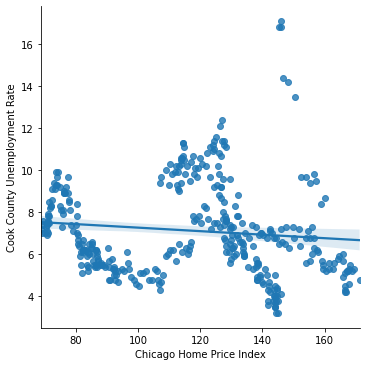

In [14]:
sns.lmplot(x="Chicago Home Price Index", y="Cook County Unemployment Rate", data=dfmonthly);

In [143]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

dfmonthly.corr(method=histogram_intersection)

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population
Unnamed: 0,1.0,70500.0,2416.0,41169.2,48463.7,2208.0,2647.9,2212.5,59455.3,70500.0
Year,70500.0,1.0,2428.0,44196.2,51576.4,2224.9,2678.3,2269.3,72467.7,753944.0
Month,2416.0,2428.0,1.0,2428.0,2428.0,1707.6,1874.1,1722.5,2428.0,2428.0
Chicago Home Price Index,41169.2,44196.2,2428.0,1.0,44072.6,2224.9,2678.3,2269.3,44196.2,44196.2
National Home Price Index,48463.7,51576.4,2428.0,44072.6,1.0,2224.9,2678.3,2269.3,51576.4,51576.4
National Unemployment Rate,2208.0,2224.9,1707.6,2224.9,2224.9,1.0,2221.3,1828.5,2224.9,2224.9
Cook County Unemployment Rate,2647.9,2678.3,1874.1,2678.3,2678.3,2221.3,1.0,1996.3,2678.3,2678.3
Mortgage Interest Rate,2212.5,2269.3,1722.5,2269.3,2269.3,1828.5,1996.3,1.0,2269.3,2269.3
CPI,59455.3,72467.7,2428.0,44196.2,51576.4,2224.9,2678.3,2269.3,1.0,72467.7
Population,70500.0,753944.0,2428.0,44196.2,51576.4,2224.9,2678.3,2269.3,72467.7,1.0


In [144]:
dfmonthly.corr(method='pearson')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population
Unnamed: 0,1.000000,0.999492,0.010354,0.774164,0.929060,0.045359,0.078641,-0.944691,0.995408,0.996540
Year,0.999492,1.000000,-0.021520,0.773711,0.928780,0.045534,0.081820,-0.944087,0.994951,0.995924
Month,0.010354,-0.021520,1.000000,0.009882,0.003619,-0.005730,-0.100161,-0.013691,0.008782,0.013784
Chicago Home Price Index,0.774164,0.773711,0.009882,1.000000,0.914892,-0.145789,-0.106509,-0.687960,0.795402,0.795801
National Home Price Index,0.929060,0.928780,0.003619,0.914892,1.000000,-0.074177,-0.022523,-0.832606,0.926198,0.923171
National Unemployment Rate,0.045359,0.045534,-0.005730,-0.145789,-0.074177,1.000000,0.945789,-0.188562,0.063591,0.049238
Cook County Unemployment Rate,0.078641,0.081820,-0.100161,-0.106509,-0.022523,0.945789,1.000000,-0.220208,0.092135,0.077076
Mortgage Interest Rate,-0.944691,-0.944087,-0.013691,-0.687960,-0.832606,-0.188562,-0.220208,1.000000,-0.942545,-0.947142
CPI,0.995408,0.994951,0.008782,0.795402,0.926198,0.063591,0.092135,-0.942545,1.000000,0.997728
Population,0.996540,0.995924,0.013784,0.795801,0.923171,0.049238,0.077076,-0.947142,0.997728,1.000000


In [145]:
dfmonthly.corr(method='kendall')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population
Unnamed: 0,1.000000,0.985339,0.015683,0.659319,0.815830,-0.115971,-0.060353,-0.785939,0.974938,1.000000
Year,0.985339,1.000000,-0.014896,0.652171,0.810636,-0.110555,-0.049740,-0.790636,0.972094,0.985339
Month,0.015683,-0.014896,1.000000,0.012014,0.009440,0.003842,-0.080774,-0.007398,0.007532,0.015683
Chicago Home Price Index,0.659319,0.652171,0.012014,1.000000,0.816255,-0.218441,-0.178231,-0.470253,0.651581,0.659319
National Home Price Index,0.815830,0.810636,0.009440,0.816255,1.000000,-0.251633,-0.197315,-0.624706,0.807244,0.815830
National Unemployment Rate,-0.115971,-0.110555,0.003842,-0.218441,-0.251633,1.000000,0.817725,-0.058736,-0.113629,-0.115971
Cook County Unemployment Rate,-0.060353,-0.049740,-0.080774,-0.178231,-0.197315,0.817725,1.000000,-0.092902,-0.059165,-0.060353
Mortgage Interest Rate,-0.785939,-0.790636,-0.007398,-0.470253,-0.624706,-0.058736,-0.092902,1.000000,-0.770394,-0.785939
CPI,0.974938,0.972094,0.007532,0.651581,0.807244,-0.113629,-0.059165,-0.770394,1.000000,0.974938
Population,1.000000,0.985339,0.015683,0.659319,0.815830,-0.115971,-0.060353,-0.785939,0.974938,1.000000


In [146]:
dfmonthly.corr(method='spearman')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population
Unnamed: 0,1.000000,0.999499,0.010303,0.763957,0.923437,-0.092271,-0.037163,-0.941974,0.998247,1.000000
Year,0.999499,1.000000,-0.021134,0.763383,0.923017,-0.092732,-0.033971,-0.941542,0.997845,0.999499
Month,0.010303,-0.021134,1.000000,0.011962,0.006590,0.006179,-0.113334,-0.007454,0.007269,0.010303
Chicago Home Price Index,0.763957,0.763383,0.011962,1.000000,0.931022,-0.282929,-0.236132,-0.671303,0.767611,0.763957
National Home Price Index,0.923437,0.923017,0.006590,0.931022,1.000000,-0.284952,-0.229694,-0.822804,0.923842,0.923437
National Unemployment Rate,-0.092271,-0.092732,0.006179,-0.282929,-0.284952,1.000000,0.946855,-0.088221,-0.097623,-0.092271
Cook County Unemployment Rate,-0.037163,-0.033971,-0.113334,-0.236132,-0.229694,0.946855,1.000000,-0.146084,-0.042478,-0.037163
Mortgage Interest Rate,-0.941974,-0.941542,-0.007454,-0.671303,-0.822804,-0.088221,-0.146084,1.000000,-0.936948,-0.941974
CPI,0.998247,0.997845,0.007269,0.767611,0.923842,-0.097623,-0.042478,-0.936948,1.000000,0.998247
Population,1.000000,0.999499,0.010303,0.763957,0.923437,-0.092271,-0.037163,-0.941974,0.998247,1.000000


In [8]:
fo = pd.read_excel("Resources/Financial Obligation.xlsx")
ds = pd.read_excel("Resources/Debt Service.xlsx")

fo['Month'] = pd.DatetimeIndex(fo['Date']).month
fo['Year'] = pd.DatetimeIndex(fo['Date']).year
fo = fo[["Year", "Month", "Financial Obligation %"]]

ds['Month'] = pd.DatetimeIndex(ds['Date']).month
ds['Year'] = pd.DatetimeIndex(ds['Date']).year
ds = ds[["Year", "Month", "Debt Service %"]]

dfq = dfmonthly.merge(fo, how="inner", on=["Year", 'Month'])
dfquarterly = dfq.merge(ds, how="inner", on=["Year", "Month"])

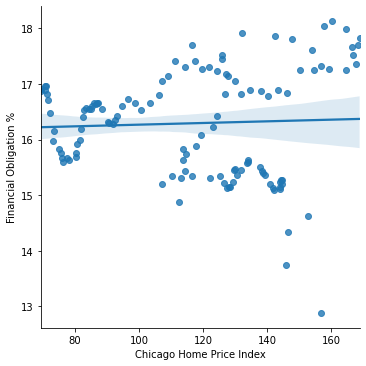

In [148]:
sns.lmplot(x="Chicago Home Price Index", y="Financial Obligation %", data=dfquarterly);

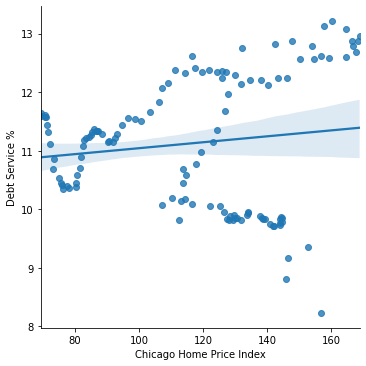

In [149]:
sns.lmplot(x="Chicago Home Price Index", y="Debt Service %", data=dfquarterly);

In [150]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

dfquarterly.corr(method=histogram_intersection)

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Financial Obligation %,Debt Service %
Unnamed: 0,1.0,23250.0,679.0,13613.0,15990.8,735.6,890.2,734.5,19651.0,23250.0,1980.4,1363.0
Year,23250.0,1.0,683.0,14646.0,17054.0,743.4,903.6,756.9,24027.1,250641.0,2036.8,1391.4
Month,679.0,683.0,1.0,683.0,683.0,509.9,559.5,515.3,683.0,683.0,683.0,681.2
Chicago Home Price Index,13613.0,14646.0,683.0,1.0,14604.2,743.4,903.6,756.9,14646.0,14646.0,2036.8,1391.4
National Home Price Index,15990.8,17054.0,683.0,14604.2,1.0,743.4,903.6,756.9,17054.0,17054.0,2036.8,1391.4
National Unemployment Rate,735.6,743.4,509.9,743.4,743.4,1.0,742.9,609.3,743.4,743.4,742.3,736.4
Cook County Unemployment Rate,890.2,903.6,559.5,903.6,903.6,742.9,1.0,669.4,903.6,903.6,900.2,885.8
Mortgage Interest Rate,734.5,756.9,515.3,756.9,756.9,609.3,669.4,1.0,756.9,756.9,756.9,756.9
CPI,19651.0,24027.1,683.0,14646.0,17054.0,743.4,903.6,756.9,1.0,24027.1,2036.8,1391.4
Population,23250.0,250641.0,683.0,14646.0,17054.0,743.4,903.6,756.9,24027.1,1.0,2036.8,1391.4


In [151]:
dfquarterly.corr(method='pearson')


,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.999517,0.012256,0.772872,0.928951,0.071273,0.092555,-0.943603,0.995379,0.996637,-0.481856,-0.443519
Year,0.999517,1.000000,-0.018824,0.772463,0.928667,0.071399,0.095441,-0.943275,0.994644,0.996075,-0.482674,-0.443977
Month,0.012256,-0.018824,1.000000,0.010621,0.006108,-0.004267,-0.093166,-0.007440,0.020386,0.014815,0.027892,0.016195
Chicago Home Price Index,0.772872,0.772463,0.010621,1.000000,0.915833,-0.123183,-0.100898,-0.685578,0.794195,0.794928,0.044644,0.129980
National Home Price Index,0.928951,0.928667,0.006108,0.915833,1.000000,-0.041996,-0.012265,-0.830501,0.926078,0.923995,-0.305520,-0.244354
National Unemployment Rate,0.071273,0.071399,-0.004267,-0.123183,-0.041996,1.000000,0.958630,-0.203787,0.083769,0.071898,-0.225404,-0.182094
Cook County Unemployment Rate,0.092555,0.095441,-0.093166,-0.100898,-0.012265,0.958630,1.000000,-0.230212,0.100717,0.090055,-0.265030,-0.209080
Mortgage Interest Rate,-0.943603,-0.943275,-0.007440,-0.685578,-0.830501,-0.203787,-0.230212,1.000000,-0.941326,-0.946283,0.528142,0.476725
CPI,0.995379,0.994644,0.020386,0.794195,0.926078,0.083769,0.100717,-0.941326,1.000000,0.997853,-0.429630,-0.387272
Population,0.996637,0.996075,0.014815,0.794928,0.923995,0.071898,0.090055,-0.946283,0.997853,1.000000,-0.429841,-0.387871


In [152]:
dfquarterly.corr(method='kendall')


,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.987927,0.013801,0.660903,0.816516,-0.110805,-0.057396,-0.783742,0.977933,1.000000,-0.259871,-0.260387
Year,0.987927,1.000000,-0.013970,0.654090,0.812127,-0.105173,-0.047977,-0.788095,0.970551,0.987927,-0.263047,-0.263830
Month,0.013801,-0.013970,1.000000,0.011724,0.009943,0.002246,-0.081694,-0.004897,0.017959,0.013801,0.009646,0.000742
Chicago Home Price Index,0.660903,0.654090,0.011724,1.000000,0.816000,-0.216010,-0.180240,-0.469935,0.655310,0.660903,0.021419,0.041032
National Home Price Index,0.816516,0.812127,0.009943,0.816000,1.000000,-0.247780,-0.194264,-0.625032,0.809395,0.816516,-0.124387,-0.107871
National Unemployment Rate,-0.110805,-0.105173,0.002246,-0.216010,-0.247780,1.000000,0.823039,-0.061066,-0.110038,-0.110805,-0.077732,-0.064452
Cook County Unemployment Rate,-0.057396,-0.047977,-0.081694,-0.180240,-0.194264,0.823039,1.000000,-0.096093,-0.061040,-0.057396,-0.071421,-0.063370
Mortgage Interest Rate,-0.783742,-0.788095,-0.004897,-0.469935,-0.625032,-0.061066,-0.096093,1.000000,-0.768615,-0.783742,0.326452,0.310452
CPI,0.977933,0.970551,0.017959,0.655310,0.809395,-0.110038,-0.061040,-0.768615,1.000000,0.977933,-0.261453,-0.255775
Population,1.000000,0.987927,0.013801,0.660903,0.816516,-0.110805,-0.057396,-0.783742,0.977933,1.000000,-0.259871,-0.260387


In [153]:
dfquarterly.corr(method='spearman')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.999524,0.012197,0.764184,0.923238,-0.087230,-0.028802,-0.940178,0.998141,1.000000,-0.478089,-0.461137
Year,0.999524,1.000000,-0.018451,0.763657,0.922805,-0.087576,-0.025891,-0.939870,0.997387,0.999524,-0.478108,-0.460895
Month,0.012197,-0.018451,1.000000,0.013183,0.009636,0.003081,-0.107240,-0.005752,0.021122,0.012197,0.011673,0.003630
Chicago Home Price Index,0.764184,0.763657,0.013183,1.000000,0.930636,-0.279956,-0.235983,-0.669358,0.768211,0.764184,0.056160,0.086316
National Home Price Index,0.923238,0.922805,0.009636,0.930636,1.000000,-0.279000,-0.223225,-0.820793,0.923573,0.923238,-0.242058,-0.228240
National Unemployment Rate,-0.087230,-0.087576,0.003081,-0.279956,-0.279000,1.000000,0.950008,-0.090439,-0.093923,-0.087230,-0.105794,-0.080226
Cook County Unemployment Rate,-0.028802,-0.025891,-0.107240,-0.235983,-0.223225,0.950008,1.000000,-0.154475,-0.037654,-0.028802,-0.110747,-0.085015
Mortgage Interest Rate,-0.940178,-0.939870,-0.005752,-0.669358,-0.820793,-0.090439,-0.154475,1.000000,-0.934313,-0.940178,0.519441,0.491963
CPI,0.998141,0.997387,0.021122,0.768211,0.923573,-0.093923,-0.037654,-0.934313,1.000000,0.998141,-0.476490,-0.456388
Population,1.000000,0.999524,0.012197,0.764184,0.923238,-0.087230,-0.028802,-0.940178,0.998141,1.000000,-0.478089,-0.461137


In [9]:
dfmonthly08 = dfmonthly.merge(mp, how="inner", on=["Year", 'Month'])
dfmonthly08

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price
0,219,2008,4,153.931433,168.338,5.0,5.6,5.9175,212.662,303926,250583
1,220,2008,5,152.008448,166.659,5.4,6.4,6.0360,214.932,304157,251833
2,221,2008,6,149.959806,165.019,5.6,7.3,6.3200,215.738,304396,255167
3,222,2008,7,147.545839,163.570,5.8,7.3,6.4260,217.459,304646,258667
4,223,2008,8,145.938778,161.991,6.1,7.2,6.4775,215.971,304903,260667
...,...,...,...,...,...,...,...,...,...,...,...
152,371,2020,12,155.457127,235.568,6.7,9.4,2.6840,244.235,330924,263333
153,372,2021,1,156.633251,238.555,6.3,9.8,2.7350,246.008,330968,257667
154,373,2021,2,157.326126,241.624,6.2,9.5,2.8100,247.387,331004,256000
155,374,2021,3,158.730817,245.303,6.0,8.4,3.0825,248.984,331061,259333


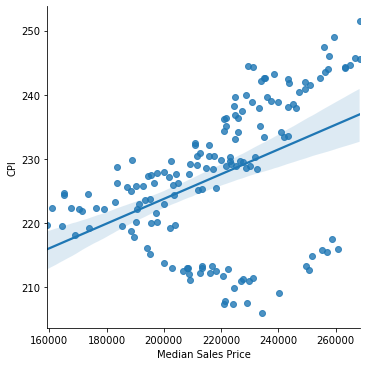

In [155]:
sns.lmplot(x="Median Sales Price", y="CPI", data=dfmonthly08);

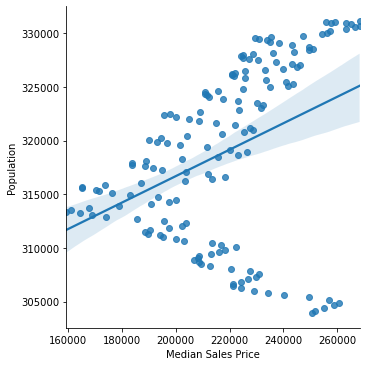

In [156]:
sns.lmplot(x="Median Sales Price", y="Population", data=dfmonthly08);

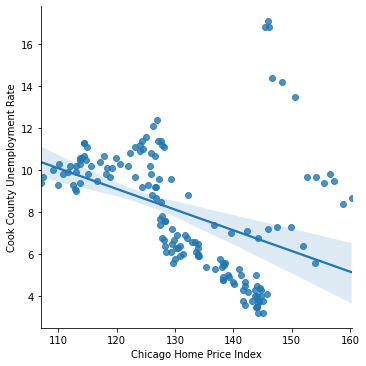

In [10]:
sns.lmplot(x="Chicago Home Price Index", y="Cook County Unemployment Rate", data=dfmonthly08);

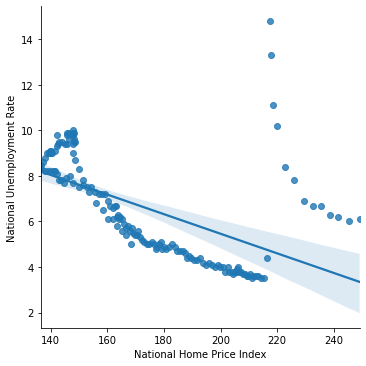

In [12]:
sns.lmplot(x="National Home Price Index", y="National Unemployment Rate", data=dfmonthly08);

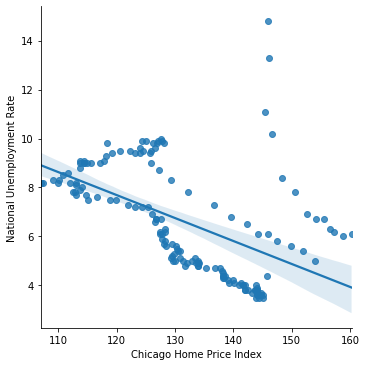

In [13]:
sns.lmplot(x="Chicago Home Price Index", y="National Unemployment Rate", data=dfmonthly08);

In [157]:
dfmonthly08.corr(method='pearson')


,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price
Unnamed: 0,1.000000,0.997129,-0.018022,0.632592,0.909188,-0.564031,-0.419574,-0.693455,0.977669,0.997778,0.429349
Year,0.997129,1.000000,-0.093676,0.630069,0.906927,-0.560653,-0.412362,-0.691145,0.976214,0.994557,0.416875
Month,-0.018022,-0.093676,1.000000,-0.002067,-0.020989,-0.013070,-0.071767,0.008289,-0.035478,-0.013274,0.140700
Chicago Home Price Index,0.632592,0.630069,-0.002067,1.000000,0.887548,-0.519349,-0.419550,-0.064470,0.646107,0.599170,0.874790
National Home Price Index,0.909188,0.906927,-0.020989,0.887548,1.000000,-0.550915,-0.413570,-0.454964,0.905974,0.886071,0.717399
National Unemployment Rate,-0.564031,-0.560653,-0.013070,-0.519349,-0.550915,1.000000,0.952399,0.123964,-0.571017,-0.579988,-0.281778
Cook County Unemployment Rate,-0.419574,-0.412362,-0.071767,-0.419550,-0.413570,0.952399,1.000000,-0.027806,-0.413053,-0.438186,-0.212411
Mortgage Interest Rate,-0.693455,-0.691145,0.008289,-0.064470,-0.454964,0.123964,-0.027806,1.000000,-0.654794,-0.702457,0.060723
CPI,0.977669,0.976214,-0.035478,0.646107,0.905974,-0.571017,-0.413053,-0.654794,1.000000,0.970048,0.449069
Population,0.997778,0.994557,-0.013274,0.599170,0.886071,-0.579988,-0.438186,-0.702457,0.970048,1.000000,0.390385


In [158]:
dfmonthly08.corr(method='spearman')


,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price
Unnamed: 0,1.000000,0.997235,-0.018366,0.654451,0.883313,-0.650080,-0.552209,-0.640175,0.979568,1.000000,0.442856
Year,0.997235,1.000000,-0.091224,0.654562,0.882370,-0.652078,-0.549746,-0.634727,0.978055,0.997235,0.433320
Month,-0.018366,-0.091224,1.000000,0.001533,-0.012145,0.001568,-0.068257,-0.006355,-0.024914,-0.018366,0.129580
Chicago Home Price Index,0.654451,0.654562,0.001533,1.000000,0.911591,-0.609307,-0.553992,-0.161545,0.690289,0.654451,0.857509
National Home Price Index,0.883313,0.882370,-0.012145,0.911591,1.000000,-0.701131,-0.623155,-0.406375,0.888436,0.883313,0.726501
National Unemployment Rate,-0.650080,-0.652078,0.001568,-0.609307,-0.701131,1.000000,0.967308,0.207946,-0.683104,-0.650080,-0.374585
Cook County Unemployment Rate,-0.552209,-0.549746,-0.068257,-0.553992,-0.623155,0.967308,1.000000,0.111232,-0.581804,-0.552209,-0.336489
Mortgage Interest Rate,-0.640175,-0.634727,-0.006355,-0.161545,-0.406375,0.207946,0.111232,1.000000,-0.602655,-0.640175,-0.010130
CPI,0.979568,0.978055,-0.024914,0.690289,0.888436,-0.683104,-0.581804,-0.602655,1.000000,0.979568,0.484639
Population,1.000000,0.997235,-0.018366,0.654451,0.883313,-0.650080,-0.552209,-0.640175,0.979568,1.000000,0.442856


In [159]:
dfmonthly08.corr(method='kendall')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price
Unnamed: 0,1.000000,0.965348,0.007737,0.577985,0.748653,-0.618496,-0.505771,-0.490893,0.894659,1.000000,0.331032
Year,0.965348,1.000000,-0.065437,0.575893,0.740506,-0.612382,-0.494258,-0.486769,0.898690,0.965348,0.328355
Month,0.007737,-0.065437,1.000000,0.003316,0.001615,-0.002057,-0.052377,-0.007228,-0.014198,0.007737,0.081846
Chicago Home Price Index,0.577985,0.575893,0.003316,1.000000,0.816593,-0.483797,-0.441432,-0.118272,0.556917,0.577985,0.676200
National Home Price Index,0.748653,0.740506,0.001615,0.816593,1.000000,-0.630023,-0.559278,-0.279670,0.723338,0.748653,0.549214
National Unemployment Rate,-0.618496,-0.612382,-0.002057,-0.483797,-0.630023,1.000000,0.857065,0.141485,-0.603676,-0.618496,-0.253437
Cook County Unemployment Rate,-0.505771,-0.494258,-0.052377,-0.441432,-0.559278,0.857065,1.000000,0.073303,-0.501504,-0.505771,-0.239634
Mortgage Interest Rate,-0.490893,-0.486769,-0.007228,-0.118272,-0.279670,0.141485,0.073303,1.000000,-0.416401,-0.490893,0.009236
CPI,0.894659,0.898690,-0.014198,0.556917,0.723338,-0.603676,-0.501504,-0.416401,1.000000,0.894659,0.370255
Population,1.000000,0.965348,0.007737,0.577985,0.748653,-0.618496,-0.505771,-0.490893,0.894659,1.000000,0.331032


In [160]:
dfquarterly08 = dfmonthly08.merge(dfquarterly, how="inner", on=["Year", 'Month', 'Chicago Home Price Index', 'National Home Price Index', 'National Unemployment Rate', 'Cook County Unemployment Rate', 'Mortgage Interest Rate', 'CPI', 'Population', 'Unnamed: 0'])
dfquarterly08.head(10)

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price,Financial Obligation %,Debt Service %
0,219,2008,4,153.931433,168.338,5.0,5.6,5.9175,212.662,303926,250583,17.609101,12.791799
1,222,2008,7,147.545839,163.570,5.8,7.3,6.4260,217.459,304646,258667,17.811286,12.874562
2,225,2008,10,142.347410,158.329,6.5,7.1,6.2000,213.363,305403,249500,17.870179,12.824516
3,228,2009,1,132.182815,151.504,7.8,8.8,5.0475,207.616,306035,229167,17.926085,12.755471
4,231,2009,4,125.863033,147.947,9.0,9.8,4.8100,207.886,306645,221333,17.524282,12.369979
5,234,2009,7,125.923816,148.409,9.5,10.8,5.2220,210.906,307322,229667,17.446539,12.235341
6,237,2009,10,127.569079,147.849,10.0,11.4,4.9520,211.708,308071,220620,17.145772,11.962132
7,240,2010,1,126.838672,147.395,9.8,12.4,5.0300,212.104,308706,208667,16.821582,11.681773
8,243,2010,4,124.271982,146.401,9.9,11.4,5.0980,212.929,309279,208583,16.426014,11.349470
9,246,2010,7,123.141402,144.989,9.4,11.1,4.5640,212.535,309847,218333,16.223359,11.141271


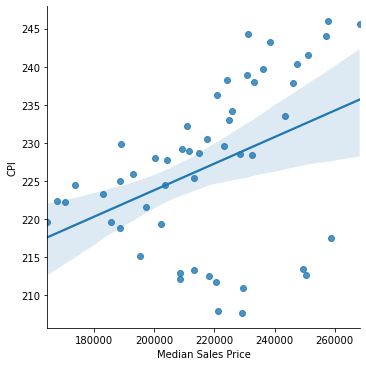

In [161]:
sns.lmplot(x="Median Sales Price", y="CPI", data=dfquarterly08);

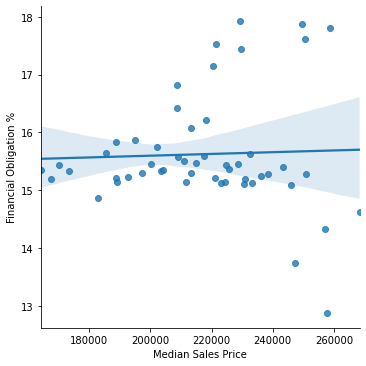

In [162]:
sns.lmplot(x="Median Sales Price", y="Financial Obligation %", data=dfquarterly08);


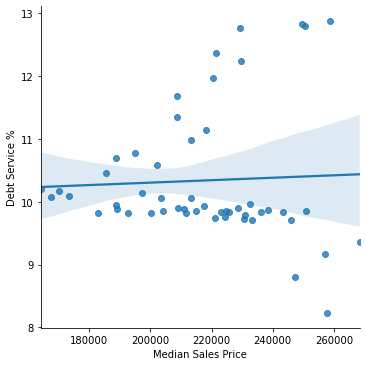

In [163]:
sns.lmplot(x="Median Sales Price", y="Debt Service %", data=dfquarterly08);


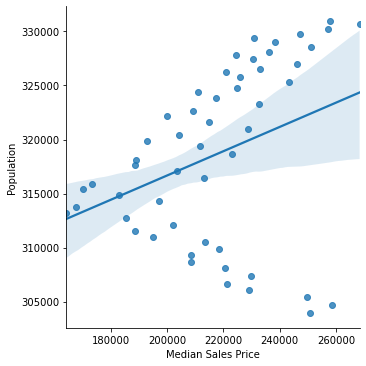

In [164]:
sns.lmplot(x="Median Sales Price", y="Population", data=dfquarterly08);


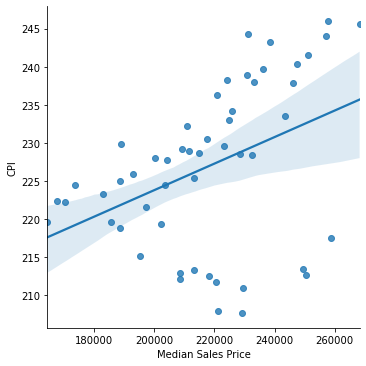

In [165]:
sns.lmplot(x="Median Sales Price", y="CPI", data=dfquarterly08);


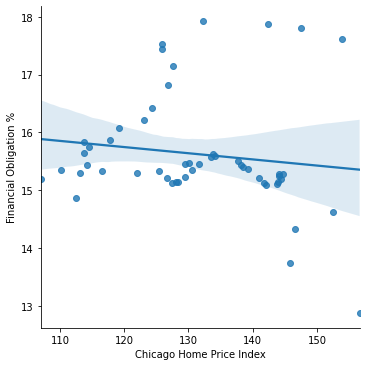

In [166]:
sns.lmplot(x="Chicago Home Price Index", y="Financial Obligation %", data=dfquarterly08);


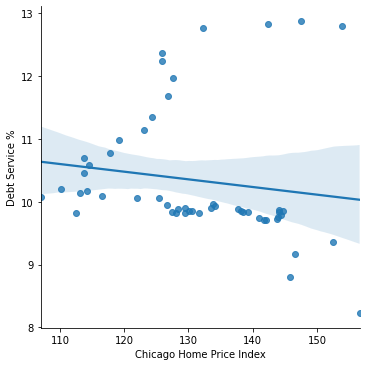

In [167]:
sns.lmplot(x="Chicago Home Price Index", y="Debt Service %", data=dfquarterly08);


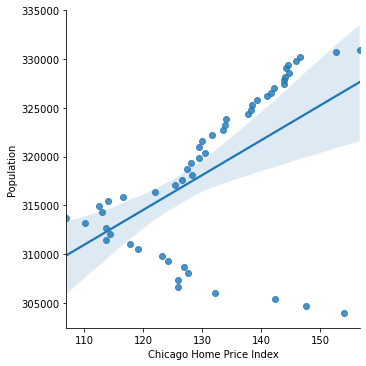

In [168]:
sns.lmplot(x="Chicago Home Price Index", y="Population", data=dfquarterly08);


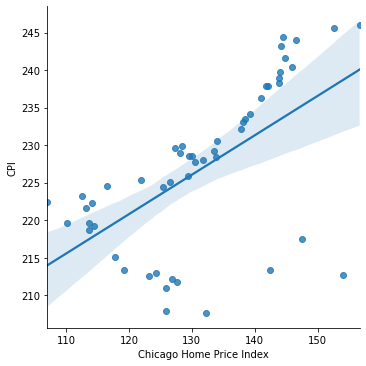

In [169]:
sns.lmplot(x="Chicago Home Price Index", y="CPI", data=dfquarterly08);


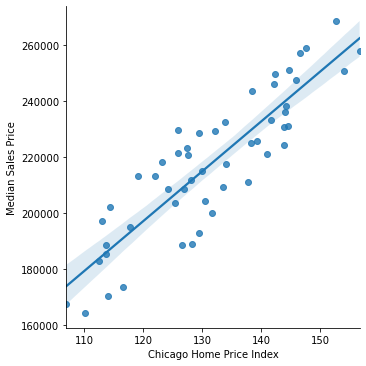

In [170]:
sns.lmplot(x="Chicago Home Price Index", y="Median Sales Price", data=dfquarterly08);

In [171]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

dfquarterly08.corr(method=histogram_intersection)

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price,Financial Obligation %,Debt Service %
Unnamed: 0,1.0,15366.0,286.0,6837.4,8988.5,346.1,420.5,217.9,11796.1,15366.0,15366.0,812.5,537.6
Year,15366.0,1.0,286.0,6837.4,8988.5,346.1,420.5,217.9,11796.1,104741.0,104741.0,812.5,537.6
Month,286.0,286.0,1.0,286.0,286.0,224.1,244.1,172.1,286.0,286.0,286.0,286.0,284.2
Chicago Home Price Index,6837.4,6837.4,286.0,1.0,6837.4,346.1,420.5,217.9,6837.4,6837.4,6837.4,812.5,537.6
National Home Price Index,8988.5,8988.5,286.0,6837.4,1.0,346.1,420.5,217.9,8988.5,8988.5,8988.5,812.5,537.6
National Unemployment Rate,346.1,346.1,224.1,346.1,346.1,1.0,345.8,212.8,346.1,346.1,346.1,345.0,339.1
Cook County Unemployment Rate,420.5,420.5,244.1,420.5,420.5,345.8,1.0,215.7,420.5,420.5,420.5,417.1,402.7
Mortgage Interest Rate,217.9,217.9,172.1,217.9,217.9,212.8,215.7,1.0,217.9,217.9,217.9,217.9,217.9
CPI,11796.1,11796.1,286.0,6837.4,8988.5,346.1,420.5,217.9,1.0,11796.1,11796.1,812.5,537.6
Population,15366.0,104741.0,286.0,6837.4,8988.5,346.1,420.5,217.9,11796.1,1.0,11312432.0,812.5,537.6


In [172]:
dfquarterly08.corr(method='kendall')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.971308,0.000000,0.553544,0.734540,-0.601980,-0.488456,-0.487179,0.900452,1.000000,0.316107,-0.603318,-0.793363
Year,0.971308,1.000000,-0.066591,0.548933,0.729063,-0.592442,-0.479494,-0.480607,0.887454,0.971308,0.299813,-0.606388,-0.795836
Month,0.000000,-0.066591,1.000000,0.005174,0.003450,0.006069,-0.037238,-0.012074,0.022422,0.000000,0.173408,0.022422,0.020698
Chicago Home Price Index,0.553544,0.548933,0.005174,1.000000,0.803922,-0.473092,-0.449076,-0.092006,0.538462,0.553544,0.699359,-0.187029,-0.358974
National Home Price Index,0.734540,0.729063,0.003450,0.803922,1.000000,-0.626241,-0.561156,-0.273002,0.713424,0.734540,0.557526,-0.355958,-0.533937
National Unemployment Rate,-0.601980,-0.592442,0.006069,-0.473092,-0.626241,1.000000,0.870195,0.128887,-0.597431,-0.601980,-0.261664,0.248677,0.429119
Cook County Unemployment Rate,-0.488456,-0.479494,-0.037238,-0.449076,-0.561156,0.870195,1.000000,0.061341,-0.503601,-0.488456,-0.281820,0.190081,0.361230
Mortgage Interest Rate,-0.487179,-0.480607,-0.012074,-0.092006,-0.273002,0.128887,0.061341,1.000000,-0.405732,-0.487179,0.039985,0.401207,0.440422
CPI,0.900452,0.887454,0.022422,0.538462,0.713424,-0.597431,-0.503601,-0.405732,1.000000,0.900452,0.340249,-0.606335,-0.754148
Population,1.000000,0.971308,0.000000,0.553544,0.734540,-0.601980,-0.488456,-0.487179,0.900452,1.000000,0.316107,-0.603318,-0.793363


In [173]:
dfquarterly08.corr(method='pearson')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.997244,-0.014899,0.581501,0.901194,-0.478849,-0.391914,-0.685375,0.978456,0.997932,0.388333,-0.795348,-0.849330
Year,0.997244,1.000000,-0.089048,0.578981,0.898766,-0.476490,-0.386339,-0.683784,0.973307,0.995011,0.367560,-0.797248,-0.849595
Month,-0.014899,-0.089048,1.000000,0.003694,-0.014187,-0.006863,-0.054738,0.014223,0.018476,-0.012575,0.259717,0.067002,0.047783
Chicago Home Price Index,0.581501,0.578981,0.003694,1.000000,0.867477,-0.470121,-0.430458,0.005421,0.604284,0.547842,0.877204,-0.134520,-0.144950
National Home Price Index,0.901194,0.898766,-0.014187,0.867477,1.000000,-0.486859,-0.414887,-0.421054,0.900025,0.878519,0.702699,-0.553948,-0.579374
National Unemployment Rate,-0.478849,-0.476490,-0.006863,-0.470121,-0.486859,1.000000,0.968168,0.067487,-0.509712,-0.494330,-0.248178,0.129853,0.258241
Cook County Unemployment Rate,-0.391914,-0.386339,-0.054738,-0.430458,-0.414887,0.968168,1.000000,-0.044604,-0.416356,-0.407726,-0.236973,0.011291,0.144195
Mortgage Interest Rate,-0.685375,-0.683784,0.014223,0.005421,-0.421054,0.067487,-0.044604,1.000000,-0.629911,-0.696604,0.121720,0.826161,0.847548
CPI,0.978456,0.973307,0.018476,0.604284,0.900025,-0.509712,-0.416356,-0.629911,1.000000,0.971635,0.406166,-0.792356,-0.828241
Population,0.997932,0.995011,-0.012575,0.547842,0.878519,-0.494330,-0.407726,-0.696604,0.971635,1.000000,0.349326,-0.802172,-0.865270


In [174]:
dfquarterly08.corr(method='spearman')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.997350,-0.014899,0.608042,0.871425,-0.607170,-0.523131,-0.636558,0.977717,1.000000,0.407206,-0.764962,-0.912234
Year,0.997350,1.000000,-0.086183,0.608631,0.870359,-0.610174,-0.523045,-0.630631,0.972996,0.997350,0.390439,-0.762929,-0.910721
Month,-0.014899,-0.086183,1.000000,0.004584,-0.003438,0.012038,-0.045853,-0.016045,0.025213,-0.014899,0.235521,0.029798,0.033236
Chicago Home Price Index,0.608042,0.608631,0.004584,1.000000,0.896952,-0.582531,-0.558272,-0.115257,0.651669,0.608042,0.869053,-0.271920,-0.489029
National Home Price Index,0.871425,0.870359,-0.003438,0.896952,1.000000,-0.672887,-0.620866,-0.392470,0.877230,0.871425,0.722247,-0.544438,-0.762998
National Unemployment Rate,-0.607170,-0.610174,0.012038,-0.582531,-0.672887,1.000000,0.972131,0.174904,-0.652348,-0.607170,-0.368157,0.319491,0.513696
Cook County Unemployment Rate,-0.523131,-0.523045,-0.045853,-0.558272,-0.620866,0.972131,1.000000,0.094575,-0.572703,-0.523131,-0.373292,0.254435,0.442988
Mortgage Interest Rate,-0.636558,-0.630631,-0.016045,-0.115257,-0.392470,0.174904,0.094575,1.000000,-0.589345,-0.636558,0.046232,0.578161,0.603774
CPI,0.977717,0.972996,0.025213,0.651669,0.877230,-0.652348,-0.572703,-0.589345,1.000000,0.977717,0.442424,-0.788184,-0.899001
Population,1.000000,0.997350,-0.014899,0.608042,0.871425,-0.607170,-0.523131,-0.636558,0.977717,1.000000,0.407206,-0.764962,-0.912234
